<a href="https://colab.research.google.com/github/Zach-Hanson3/Food_Sales_Prediction/blob/main/Food_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Food Sales Predictions </center>
#### <center> Zach Hanson </center>

## Loading Data

In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Saving file path
filename = '/content/drive/MyDrive/Coding Dojo/sales_predictions.csv'

#Creating data frame using file path
df = pd.read_csv(filename)

#Creating a copy that we can safely alter without worrying about losing information
sales_df = df.copy()

sales_df.info()
sales_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Cleaning

In [4]:
#Start by finding the shape of this data frame
sales_df.shape

(8523, 12)

We can see there is 8523 entries (rows) and 12 different variables (columns).

In [5]:
#Find the data types of each of the different variables
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###Data Frame Cleaning


In [6]:
#Checking for duplicate rows
sales_df.duplicated().sum()

0

Sum of duplicated rows was 0, so we do not have any duplicated rows in our data.

In [7]:
#Checking to see if there is any missing values
sales_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There is 1463 values missing from Item_Weight and 2410 values missing from Outlet_Size.

In [8]:
#Removing the column of "Item_Weight"
sales_df = sales_df.drop(columns=['Item_Weight'])

#Data frame head to make sure column was dropped successfully
sales_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


I decided to remove the "Item_Weight" column because we were missing nearly 1500 entries in this column. While this alone would not warrant the removal of this variable, it also seems extremely unlikely that an item's weight would have any impact on it's sales.

In [9]:
#Replacing all the missing 'Outlet_Size' values with "Unknown"
sales_df = sales_df.fillna("Unknown")

In this case I chose to keep the "Outlet_Size" column because I do believe it might be valuable in determining the sales of an item. I replaced all the missing values with "Unknown".

In [10]:
#Double checking to make sure we removed all missing values
sales_df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- All the missing data has been removed

In [11]:
#Previewing data again with "unknown filled in for remaining missing values"
sales_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
#Checking inconsistent data in Item_Fat_Content category
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- We can see there is also values for "LF", "reg", and "low fat"

In [13]:
#Updating this inconsistent data so everything is the same
sales_df = sales_df.replace(['LF', 'low fat', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])

#Checking to make sure everything got replaced
sales_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

- Updated 'LF' and 'low fat' to 'Low Fat'
- Updated 'reg' to 'Regular'

In [14]:
#Checking 'Item_Type' column for inconsistencies
sales_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

- No inconsistencies noticed

In [15]:
#Checking 'Outlet_Size' for inconsistencies
sales_df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

- No inconsistencies noticed

In [16]:
#Checking 'Outlet_Location_Type' for inconsistencies
sales_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

- No inconsistencies noticed

In [17]:
#Checking 'Outlet_Type' for inconsistencies
sales_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

- No inconsistencies noticed

###Summary Statistics

In [18]:
#Preview of data for easy coding
sales_df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
#Creating dictionary with each numerical column, pointing to a list that will contain mean, median, and mode values for each column
sum_stat = {'Item_Visibility': {'Mean': '0', 'Median': '0', 'Mode': '0'}, 
            'Item_MRP': {'Mean': '0', 'Median': '0', 'Mode': '0'}, 
            'Outlet_Establishment_Year': {'Mean': '0', 'Median': '0', 'Mode': '0'}, 
            'Item_Outlet_Sales': {'Mean': '0', 'Median': '0', 'Mode': '0'}}

In [20]:
#Item_Visibility summary statistics 
sum_stat['Item_Visibility']['Mean'] = sales_df['Item_Visibility'].mean().round(5)
sum_stat['Item_Visibility']['Median'] = sales_df['Item_Visibility'].median().round(5)
sum_stat['Item_Visibility']['Mode'] = sales_df['Item_Visibility'].mode()

In [21]:
#Item_MRP summary statistics 
sum_stat['Item_MRP']['Mean'] = sales_df['Item_MRP'].mean().round(5)
sum_stat['Item_MRP']['Median'] = sales_df['Item_MRP'].median().round(5)
sum_stat['Item_MRP']['Mode'] = sales_df['Item_MRP'].mode()

In [22]:
#Outlet_Establishment_Year summary statistics 
sum_stat['Outlet_Establishment_Year']['Mean'] = sales_df['Outlet_Establishment_Year'].mean().round(5)
sum_stat['Outlet_Establishment_Year']['Median'] = sales_df['Outlet_Establishment_Year'].median().round(5)
sum_stat['Outlet_Establishment_Year']['Mode'] = sales_df['Outlet_Establishment_Year'].mode()

In [23]:
#Item_Outlet_Sales summary statistics 
sum_stat['Item_Outlet_Sales']['Mean'] = sales_df['Item_Outlet_Sales'].mean().round(5)
sum_stat['Item_Outlet_Sales']['Median'] = sales_df['Item_Outlet_Sales'].median().round(5)
sum_stat['Item_Outlet_Sales']['Mode'] = sales_df['Item_Outlet_Sales'].mode()

- Updating the summary statistics dictionary with all the actual values

In [24]:
#Printing all the summary statistics for each numerical column
for key in sum_stat:
  print(f"Summary Statistics for {key}:")
  print(sum_stat[key])
  print("")

Summary Statistics for Item_Visibility:
{'Mean': 0.06613, 'Median': 0.05393, 'Mode': 0    0.0
dtype: float64}

Summary Statistics for Item_MRP:
{'Mean': 140.99278, 'Median': 143.0128, 'Mode': 0    172.0422
dtype: float64}

Summary Statistics for Outlet_Establishment_Year:
{'Mean': 1997.83187, 'Median': 1999.0, 'Mode': 0    1985
dtype: int64}

Summary Statistics for Item_Outlet_Sales:
{'Mean': 2181.28891, 'Median': 1794.331, 'Mode': 0    958.752
dtype: float64}



## Exploratory Visuals

### Histograms

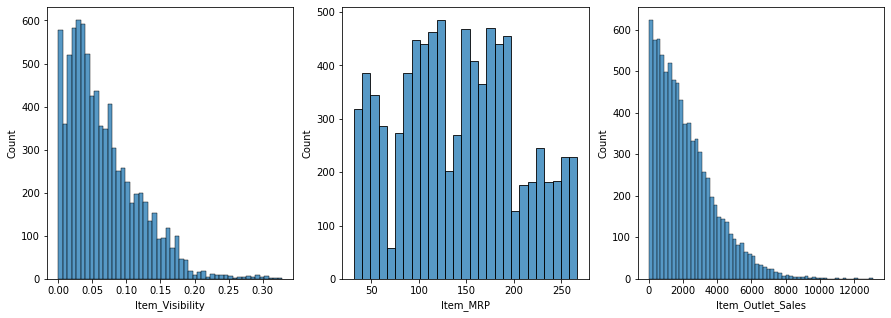

In [25]:
#Creating subplot to contain all our histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#Adding 'Item_Visibility' to subplots
sns.histplot(ax=axes[0], data=sales_df, x='Item_Visibility');

#Adding 'Item_MRP' to subplots
sns.histplot(ax=axes[1], data=sales_df, x='Item_MRP');

#Adding 'Item_Outlet_Sales' to subplots
sns.histplot(ax=axes[2], data=sales_df, x='Item_Outlet_Sales');

- Item_Visibility
 - This histogram is right skewed
 - Mean may be inaccurate due to large amount of '0' entries for this category
- Item_MRP
 - Fairly evenly spread for all the values
 - The unit price for each item is pretty evenly spread
- Item_Outlet_Sales
 - This histogram is right skewed
 - Many items have low amounts of sales at certain stores
 - Few items with large amounts of sales

### Boxplots

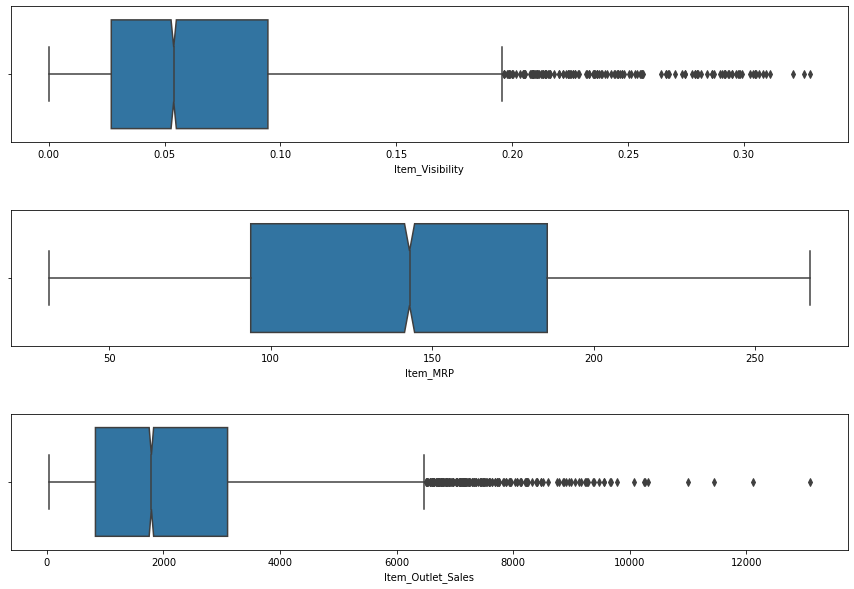

In [26]:
#Creating subplot to contain all our boxplots
fig, axes = plt.subplots(3, 1, figsize=(15,10))

#Adjusting padding between the 3 subplots for readability
fig.subplots_adjust(hspace=0.5)

#Adding 'Item_Visibility' to subplots
sns.boxplot(ax=axes[0], data=sales_df, x='Item_Visibility', notch=True);

#Adding 'Item_MRP' to subplots
sns.boxplot(ax=axes[1], data=sales_df, x='Item_MRP', notch=True);

#Adding 'Item_Outlet_Sales' to subplots
sns.boxplot(ax=axes[2], data=sales_df, x='Item_Outlet_Sales', notch=True);

- Item Visibility
 - Very low average item visibility
 - Top 25% of data has a fairly large range of values, anywhere from 0.09 to 0.19
 - Bottom 50% of data is bunched below 0.06, may be skewed because of large amount of values at 0
- Item MRP
 - Very even spread of values
 - Top 25% of data has a slightly larger range of values compared to the bottom 25%
- Item Outlet Sales
 - Similar to item visibility, the average is fairly low compared to the upper range of values
 - Top 25% also has large range of values compared to bottom 50% of data
 - Few very large outliers in this data set, over 6 times the mean in two cases

### Heatmap

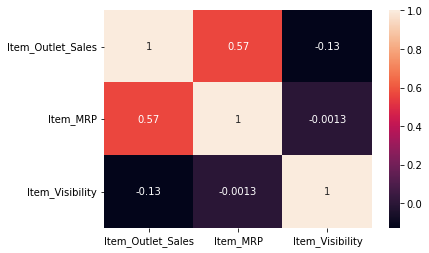

In [27]:
#Heat map of item outlet sales, item mrp and item visibilty

#Calculate correlations in numerical values for Total outlet sales, the item MRP, and the item visibility
sales_corr = sales_df[['Item_Outlet_Sales','Item_MRP','Item_Visibility']].corr()

#Create a heat map of the correlations
sns.heatmap(sales_corr,               #Input data 
            annot = True);       #Show correlation values on the heatmap

#Rotating the y labels 90 degrees for readability
plt.yticks(rotation = 0);

- There is a moderately strong positive correlation between 'Item MRP' and 'Item Outlet Sales'
- All other correlations are negligible 

## Explanatory Visuals

### MRP and Total Sales sorted by Store Size


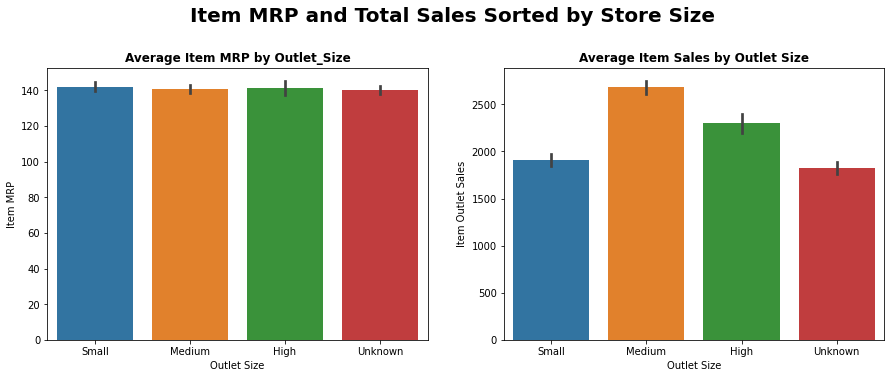

In [109]:
#Creating Subplot for both our bar charts
fig, axes = plt.subplots(ncols = 2, figsize=(15, 5))

#Creating bar chart with item MRP
sns.barplot(data = sales_df,                                  #Choosing which data to use
            x = 'Outlet_Size',                                #What goes on x axis
            y= 'Item_MRP',                                    #What goes on y axis
            ax = axes[0],                                     #Which subplot this barplot goes to
            order = ['Small', 'Medium', 'High', 'Unknown']    #Order of x axis
            );

#Creating bar chart with total sales
sns.barplot(data = sales_df,
            x = 'Outlet_Size',
            y= 'Item_Outlet_Sales',
            ax = axes[1],
            order = ['Small', 'Medium', 'High', 'Unknown']
            );

#Adding Titles to subplots
axes[0].set_title('Average Item MRP by Outlet_Size',
                  fontsize = 12,                #Fontsize 12
                  fontweight = 'bold');         #Bolding font
axes[1].set_title('Average Item Sales by Outlet Size',
                  fontsize = 12,
                  fontweight = 'bold');
#Adding title to overall data
fig.suptitle('Item MRP and Total Sales Sorted by Store Size',
             fontsize = 20,
             fontweight = 'bold',
             y = 1.05);                         #Location on y-axis of subplots for title

#Removing '_' from axis labels to make it look better
axes[0].set(xlabel='Outlet Size', ylabel='Item MRP');
axes[1].set(xlabel='Outlet Size', ylabel='Item Outlet Sales');

Interpretation
- Outlet Size has little to no impact on an items MRP
- Outlet Size may have a small impact on total item sales, but hard to determine with large amount of missing data in this category

### MRP and Total Sales sorted by Store Location

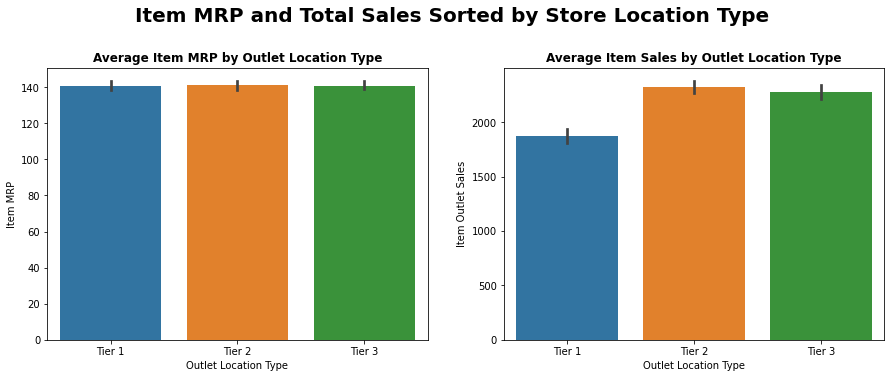

In [110]:
#Creating Subplot for both our bar charts
fig, axes = plt.subplots(ncols = 2, figsize=(15, 5))

#Creating bar chart with item MRP
sns.barplot(data = sales_df,
            x = 'Outlet_Location_Type',
            y= 'Item_MRP',
            ax = axes[0],
            order = ['Tier 1', 'Tier 2', 'Tier 3']
            );

#Creating bar chart with total sales
sns.barplot(data = sales_df,
            x = 'Outlet_Location_Type',
            y= 'Item_Outlet_Sales',
            ax = axes[1],
            order = ['Tier 1', 'Tier 2', 'Tier 3']
            );

#Adding Titles to subplots
axes[0].set_title('Average Item MRP by Outlet Location Type',
                  fontsize = 12,
                  fontweight = 'bold');
axes[1].set_title('Average Item Sales by Outlet Location Type',
                  fontsize = 12,
                  fontweight = 'bold');
#Adding title to overall data
fig.suptitle('Item MRP and Total Sales Sorted by Store Location Type', fontsize = 20, fontweight = 'bold', y = 1.05);

#Removing '_' from axis labels to make it look better
axes[0].set(xlabel='Outlet Location Type', ylabel='Item MRP');
axes[1].set(xlabel='Outlet Location Type', ylabel='Item Outlet Sales');

Interpretation
- Outlet location type has little to no impact on an item's MRP
- Outlet location type of Tier 2 and Tier 3 have, on average, higher total item sales compared to Tier 1 location type

### MRP and Total Sales sorted by Store Type

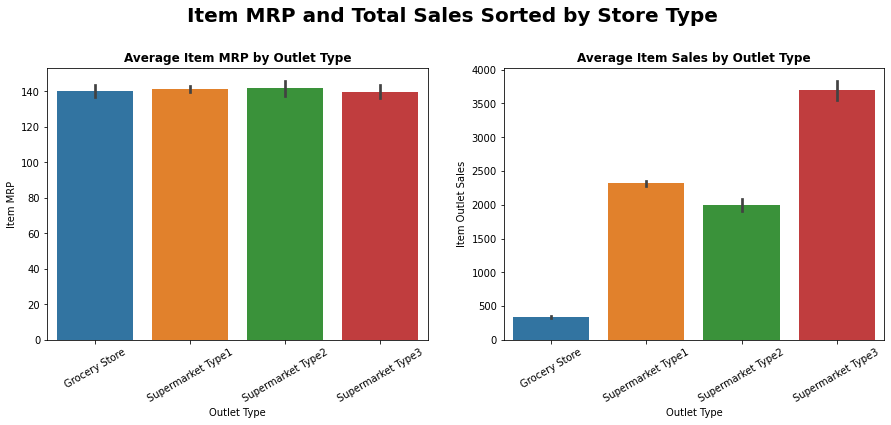

In [115]:
#Creating Subplot for both our bar charts
fig, axes = plt.subplots(ncols = 2, figsize=(15, 5))

#Creating bar chart with item MRP
p1 = sns.barplot(data = sales_df,
            x = 'Outlet_Type',
            y= 'Item_MRP',
            ax = axes[0],
            order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
            );
#Rotating x axis labels for readability
p1.set_xticklabels(p1.get_xticklabels(), rotation=30);

#Creating bar chart with total sales
p2 = sns.barplot(data = sales_df,
            x = 'Outlet_Type',
            y= 'Item_Outlet_Sales',
            ax = axes[1],
            order = ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']
            );
#Rotating x axis labels for readability
p2.set_xticklabels(p2.get_xticklabels(), rotation=30);

#Adding Titles to subplots
axes[0].set_title('Average Item MRP by Outlet Type',
                  fontsize = 12,
                  fontweight = 'bold');
axes[1].set_title('Average Item Sales by Outlet Type',
                  fontsize = 12,
                  fontweight = 'bold');
#Adding title to overall data
fig.suptitle('Item MRP and Total Sales Sorted by Store Type', fontsize = 20, fontweight = 'bold', y = 1.05);

#Removing '_' from axis labels to make it look better
axes[0].set(xlabel='Outlet Type', ylabel='Item MRP');
axes[1].set(xlabel='Outlet Type', ylabel='Item Outlet Sales');

Interpretation
- Outlet type has little to no impact on an item's MRP
- Outlet type has a large impact on an items total sales
 - Supermarket Type 3 has just under 50% more sales than Supermarket Type 1 and 2
 - Supermarket Type 3 has just over 3000 more sales on average than Grocery Store 
 - Supermarket Type 1 and 2 have close to the same total sales, with Type 1 having around 300 more than Type 2
 - Supermarket Type 1 and 2 have between 1500 and 2000 more total sales than Grocery Store

- Code for rotating x-axis labels derived from: https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html

### Overall Interpretation

If looking for the highest amount of total sales, based on the data we have the ideal outlet would be a medium size, Supermarket Type 3, located in a Tier 2 or Tier 3 location. It should be noted that the size and location have a significantly smaller impact on an items sales compared to the type of outlet, and the store size has a slightly larger impact than location. 